# **LATIHAN 1 - MATRIKS DEKOMPOSISI**
## **Anggota Kelompok :**
### 1) Muhammad Ido Raskapati (1906354154)
### 2) Timothy Devan Chandra (1906375726)
### 3) Salsabil Felia Armansyah (1806185815)
### 4) Zahra Novanka (1806185834)

**A. IMPOR MODUL**

Terlebih dahulu dilakukan impor modul ke dalam program yang akan dibuat. Dengan mengimpor modul, maka definisi, variabel, fungsi, dan yang lainnya yang terdapat pada modul tersebut dapat dipergunakan.

In [ ]:
# Load the required libraries
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
pd.set_option("display.max_colwidth", 200)

**B. LOAD DATA**

Dilakukan *processing data* atau melakukan *training data*. Data yang dipakai adalah ***Twenty Newsgroups Data Set.*** 

In [ ]:
# Load data
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

Dataset diperoleh dari UCI Machine Learning Repository yang terdiri dari 20.000 pesan yang diambil dari 20 *Newsgroup.*

In [ ]:
# Look at the dataset
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

Jumlah keseluruhan dokumen pada dataset.

In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


Memunculkan nama 20 newsgroup pada dataset

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Pada dataset ini terdapat 11.314 dokumen teks yang didistribusikan pada 20 *newsgroup* yang berbeda.

**C. PREPROCESSING DATA**

Data preprocessing digunakan untuk menghapus noise, missing value, error, data yang tidak penting, dan data yang tidak konsisten. Tujuan dilakukan data preprocessing yaitu untuk mentransformasikan data mentah untuk dianalisis agar dapat menghasilkan data yang berkualitas dan akurat.

In [ ]:
# Load the required libraries
import pandas as pd

# Load data from list to datafame for further processing.
news_df = pd.DataFrame({'document':documents})

# Removing everything except alphabets (i.e. the punctuations, numbers, and special characters) 
# and will replace them with blank space
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words because they usually don’t contain useful information
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase to nullify case sensitivity.
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

Pada tahap ini, sangat penting untuk menghapus *stop-words* dari data teks karena sebagian besar data adalah data acak dan hampir tidak dapat membawa informasi apapun.


*Stop-words* adalah istilah seperti *'it', 'they' , 'am' , 'been' , 'about' , 'because' , 'while' , 'the' ,* dan lain-lainnya. 


Untuk menghapus *stop-words* dari dokumen, maka harus membuat *tokenize the text*, yaitu membagi *string of text* menjadi token atau kata-kata individual. Dan akan disatukan kembali token tersebut setelah menghapus *stop-words.* 

In [ ]:
# Load stopwords (here I used Spacy for stopwords you can also use NLTK)
!pip install spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# tokenization - break sentences into words
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Join words to get back the sentences
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**D. MATRIKS DOCUMENT-TERM**

Misal terdapat jumlah dokument teks yaitu m dan jumlah kata unik yaitu n. Jumlah topik yaitu k, harus ditentukan oleh user untuk mengekstrak k topik tersebut dari semua data teks dalam dokumen.
1. Membuat matriks dengan data document berbentuk mxn yang memiliki skor TF-IDF
2. Melakukan reduksi dimensi matriks di atas menjadi dimensi k (jumlah topik yang diinginkan), menggunakan dekomposisi nilai tunggal (SVD).
3. SVD dapat menguraikan suatu matriks menjadi tiga matriks lainnya. Misalkan untuk menguraikan matriks A menggunakan SVD. Akan didekomposisi menjadi matriks U, matriks S, dan VT (transpose matriks V).

Berikut akan digunakan TfidfVectorizer sklearn untuk membuat matriks *document-term* dengan 1000 kata

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer: ignore English stopwords & words that occur less than 5 times
vsm = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vsm.fit_transform(news_df['clean_doc'])

X.shape

(11314, 1000)

In [ ]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.20185845, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2321243 , 0.        ,
        0.        ]])

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'ha


**E. Topic Modeling**

Langkah selanjutnya adalah menggambarkan setiap kata dan dokumen sebagai vektor. Kita akan menggunakan Document-Term Matrix dan Truncated SVD untuk mendekomposisinya menjadi beberapa matriks.

Karena terdapat 20 newsgroup berbeda, kita ambil 20 topik dari data teks tersebut.

In [ ]:
# SVD represent documents and terms in vectors
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
X_topics = svd_model.fit_transform(X)

U = X_topics / svd_model.singular_values_
s = svd_model.singular_values_
V = svd_model.components_

print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (11314, 20) (20,) (20, 1000)
[16.51531273  9.92487725  8.19615597  7.91339664  7.6131204   7.32144228
  7.1523358   6.92718692  6.87982252  6.72510776  6.62240462  6.54554761
  6.49345393  6.37955551  6.22349006  6.1740069   6.07121774  5.97275599
  5.95413419  5.8925516 ]


Pada tahap ini akan ditampilkan beberapa kata yang paling penting dari masing-masing 20 topik. Berikut adalah modelnya:

In [ ]:
# get top words for each topic
n_top_words = 5
topic_word_list = []
topic_word = V  # all topic words
vocab = vsm.get_feature_names()

for i, topic_dist in enumerate(V):
  topic_word = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
  topic_word_list.append(' '.join(topic_word)) # append!
  
for i in enumerate(topic_word_list):
  print("Topic ",i[0]+1,": ",i[1], end='', flush=True)
  print(" ")

Topic  1 :  like know people think good 
Topic  2 :  thanks windows card drive mail 
Topic  3 :  game team year games season 
Topic  4 :  drive scsi hard disk card 
Topic  5 :  windows file window files program 
Topic  6 :  government space chip mail information 
Topic  7 :  like bike chip sounds know 
Topic  8 :  card sale video monitor offer 
Topic  9 :  know card chip video government 
Topic  10 :  good know time bike problem 
Topic  11 :  think good chip clipper need 
Topic  12 :  thanks problem right bike good 
Topic  13 :  good people windows know sale 
Topic  14 :  space think know nasa problem 
Topic  15 :  space good card thanks people 
Topic  16 :  people problem game window time 
Topic  17 :  problem good window israel people 
Topic  18 :  file time problem need files 
Topic  19 :  need right file card files 
Topic  20 :  need time windows want israel 


**F. Topic Visualization**

Untuk melihat seberapa berbedanya antar topic, kita dapat menggambarkannya menggunakan PCA dan t-SNE yang dapat membantu memvisualisasikan dimensi data yang besar ke yang kecil. Di sini kita menggunakan t-SNE

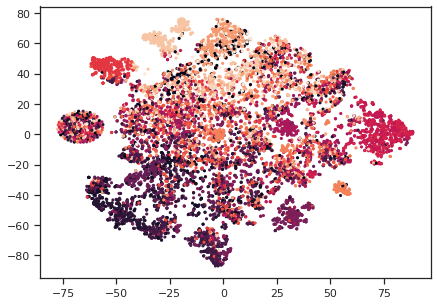

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

Seperti yang dapat dilihat, setiap titik menggambarkan sebuah dokumen dan warnanya menggambarkan 20 newsgroup.

**G. Word Cloud**

Metode visualisasi populer lainnya adalah WordCloud. Pada WordCloud, kata pada topik tertentu ditunjukkan berdasarkan hubungan mereka.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


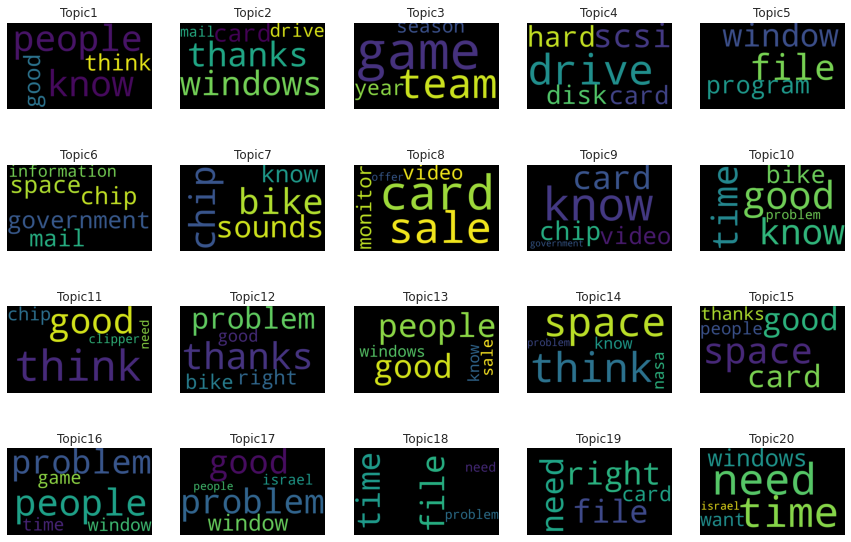

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Create figure
fig = plt.figure(figsize=(15, 10))
#Insert all topic to subplot
for i in range(len(topic_word_list)):
  t = i + 1
  plt.subplot(4, 5, t)
  wc = WordCloud(width=1000, height=600, prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topic_word_list[i])
  plt.imshow(wc)
  plt.title(f"Topic{t}")
  plt.axis("off")

Terlihat untuk setiap kata pada masing-masing topik. Jika muncul kata tersebut, maka kata tersebut dapat dikatakan cukup signifikan. Kata yang paling besar ukurannya menunjukkan bahwa kata tersebut merupakan kata yang penting pada topiknya

Dapat dilihat bahwa pada Topik ke-1,13, dan 16 sama-sama memiliki kata "people" yang menunjukkan bahwa kata itu penting dan signifikan. Hal ini berarti pada Topik ke-1,13, dan 16 memiliki hubungan yang dapat dibilang sama.

Kemudian kata "good" dimiliki oleh Topik ke-1,10,11,12,13, dan 15. Hal ini menunjukkan bahwa kata "good" merupakan kata yang penting dan signifikan untuk Topik-topik tersebut. Sehingga dapat disimpulkan bahwa Topik tersebut memiliki hubungan yang sama, yaitu sama-sama memiliki kata penting dan signifikan yang sama.